In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [36]:
def quantizeWeight(W,BW):
    Wq = np.minimum(np.round(W*np.power(2.0,BW-1.0))*np.power(2.0,1.0-BW),1.0-np.power(2.0,1.0-BW))
    return Wq

def quantizeInput(X,BX):
    return np.minimum(np.round(X*np.power(2.0,BX))*np.power(2.0,-BX) ,1.0-np.power(2.0,-BX))

In [37]:
#print(quantizeWeight(-0.4344,3))
print(quantizeInput(0.22222,3))

0.25


In [71]:
def placeUniformLevels(M):
    #M is the number of levels
    return np.arange(-2,2.01,4.0/(M-1))

def getLloydMaxLevels(M,trials):
    levels = placeUniformLevels(M) # initialize Rq
    for i in range(trials):
        thresholds = 0.5*(np.delete(levels,0)+np.delete(levels,M-1)) # Tq's
        for m in range(M):
            leftThreshold = -2 if m==0 else thresholds[m-1] #Tq
            rightThreshold = 2 if m==(M-1) else thresholds[m] #Tq+1
            if (rightThreshold<0):
                num = (rightThreshold**2 - leftThreshold**2)/4 + (rightThreshold**3 - leftThreshold**3)/12
                denum = (rightThreshold - leftThreshold)/2 + (rightThreshold**2 - leftThreshold**2)/8
                levels[m] = np.true_divide(num,denum)
            elif (leftThreshold>0):
                num = (rightThreshold**2 - leftThreshold**2)/4 - (rightThreshold**3 - leftThreshold**3)/12
                denum = (rightThreshold - leftThreshold)/2 - (rightThreshold**2 - leftThreshold**2)/8
                levels[m] = np.true_divide(num,denum)
            else: # Tq<0 and Tq+1>0
                num = (rightThreshold**2 - leftThreshold**2)/4 - (rightThreshold**3 + leftThreshold**3)/12
                denum = (rightThreshold - leftThreshold)/2 - (rightThreshold**2 + leftThreshold**2)/8
                levels[m] = np.true_divide(num,denum)
    return levels
    

print('uniform levels:', placeUniformLevels(16))
print('Llyod-Max levels:',getLloydMaxLevels(16,100))

uniform levels: [-2.         -1.73333333 -1.46666667 -1.2        -0.93333333 -0.66666667
 -0.4        -0.13333333  0.13333333  0.4         0.66666667  0.93333333
  1.2         1.46666667  1.73333333  2.        ]
Llyod-Max levels: [-1.70116036 -1.40202869 -1.14591296 -0.91240506 -0.69362234 -0.48555369
 -0.2858983  -0.09325654  0.09325654  0.2858983   0.48555369  0.69362234
  0.91240506  1.14591296  1.40202869  1.70116036]


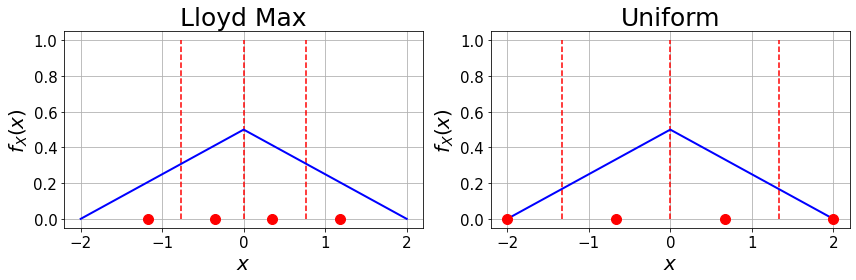

In [72]:
triangle_dist = np.asarray([[0,0.5,0],[-2,0,2]])
M=4
trials = 100
# Rq
uniformLevels = placeUniformLevels(M) 
# Tq
uniformThresholds = 0.5*(np.delete(uniformLevels,0)+np.delete(uniformLevels,M-1))

LloydMaxLevels = getLloydMaxLevels(M,trials)
LloydMaxThresholds = 0.5*(np.delete(LloydMaxLevels,0)+np.delete(LloydMaxLevels,M-1))

plt.figure(figsize=(12,4))
ax=plt.subplot(121)
line1, = ax.plot(triangle_dist[1,:],triangle_dist[0,:],label='Distribution',linewidth=2,color='b')
line2, = ax.plot(LloydMaxLevels,np.zeros(M),label='Quantization Levels',linewidth=0,color='r',marker='o',markersize=10)
line3 = ax.stem(LloydMaxThresholds,np.ones(M-1),basefmt=' ',markerfmt=' ',linefmt='r--',use_line_collection='True')

ax.grid()
ax.set_xlabel(r'$x$',fontsize=20)
ax.set_ylabel(r'$f_X(x)$',fontsize=20)
ax.tick_params(axis='both',labelsize=15)
ax.set_title('Lloyd Max',fontsize=25)

ax2=plt.subplot(122)
line1, = ax2.plot(triangle_dist[1,:],triangle_dist[0,:],label='Distribution',linewidth=2,color='b')
line2, = ax2.plot(uniformLevels,np.zeros(M),label='Quantization Levels',linewidth=0,color='r',marker='o',markersize=10)
line3 = ax2.stem(uniformThresholds,np.ones(M-1),basefmt=' ',markerfmt=' ',linefmt='r--',use_line_collection='True')
ax2.grid()
ax2.set_xlabel(r'$x$',fontsize=20)
ax2.set_ylabel(r'$f_X(x)$',fontsize=20)
ax2.tick_params(axis='both',labelsize=15)
ax2.set_title('Uniform',fontsize=25)
plt.tight_layout()
plt.show()

In [73]:
def evaluate_sqnr(Nsample,quantizationLevels):
    data = np.random.triangular(-2,0,2,Nsample)
    quantizedData = np.zeros(Nsample)
    for i in range(Nsample):
        quantizedData[i]=quantizationLevels[np.argmin(np.abs(data[i]-quantizationLevels))]
    SNR = 10*np.log10(np.true_divide(np.sum(np.var(data)),np.sum(np.var(data-quantizedData))))
    return SNR

Nsample=1000
M = 4
trials = 100
uniformLevels = placeUniformLevels(M)
LloydMaxLevels = getLloydMaxLevels(M,trials)
print('uniform quantizer sqnr:', evaluate_sqnr(Nsample,uniformLevels))
print('lloyd max quantizer sqnr:',evaluate_sqnr(Nsample,LloydMaxLevels))
    

uniform quantizer sqnr: 6.720859973473628
lloyd max quantizer sqnr: 10.6527433235319


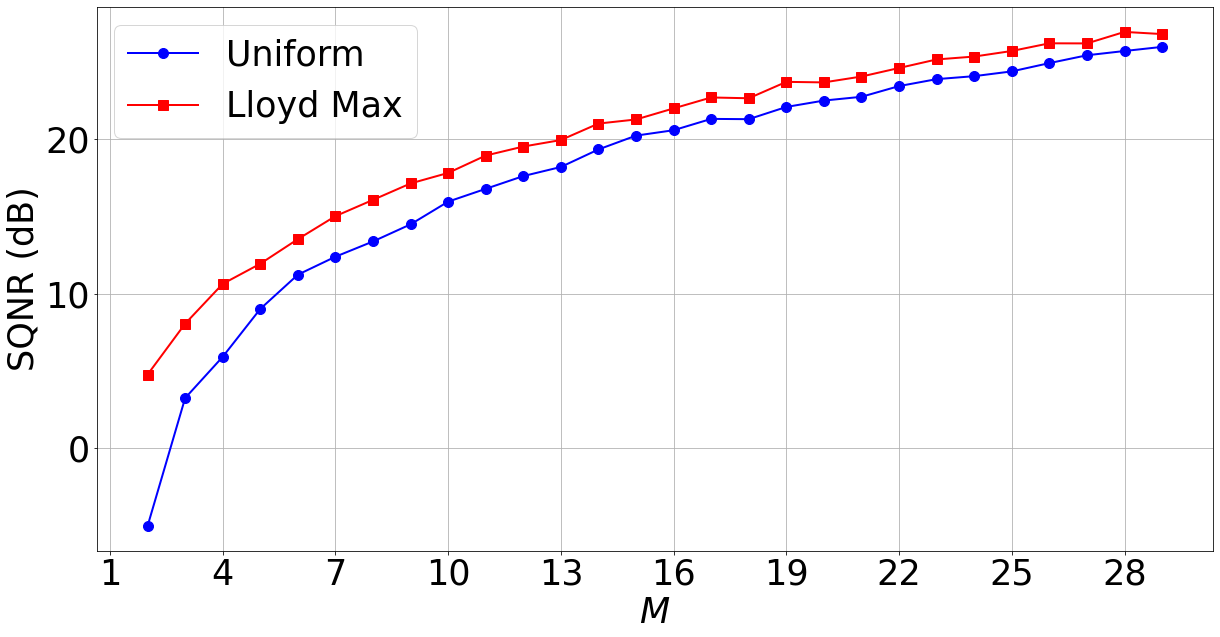

In [42]:
SQNR_uniform = []
SQNR_LM = []
Ms = []
Nsample=1000
trials = 100
for M in range(2,30):
    uniformLevels = placeUniformLevels(M)
    LloydMaxLevels = getLloydMaxLevels(M,trials)
    SQNR_uniform.append(evaluate_sqnr(Nsample,uniformLevels))
    SQNR_LM.append(evaluate_sqnr(Nsample,LloydMaxLevels))
    Ms.append(M)
    
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
line1, = ax.plot(Ms,SQNR_uniform,label='Uniform',linewidth=2,color='b',marker='o',markersize=10)
line2, = ax.plot(Ms,SQNR_LM,label='Lloyd Max',linewidth=2,color='r',marker='s',markersize=10)
plt.legend(handles=[line1,line2],loc=0,fontsize=35)
ax.grid()
ax.set_xlabel(r'$M$',fontsize=35)
ax.set_ylabel('SQNR (dB)',fontsize=35)
ax.tick_params(axis='both',labelsize=35)
ax.set_xticks(np.arange(1,30,3))
plt.show()

In [15]:
# line2, = ax.plot(BWs,SQNR_eval,label='Simulation',linewidth=2,color='r',marker='s',markersize=10)
# plt.legend(loc=0,fontsize=20)
# line2, = ax.plot(BWs,SQNR_eval,label='Simulation',linewidth=2,color='r',marker='s',markersize=10)
# plt.legend(loc=0,fontsize=20
# ax.set_xticks(np.arange(1,20,2))

In [26]:
from scipy import integrate

In [45]:
t = LloydMaxThresholds

In [46]:
r = LloydMaxLevels

In [47]:
ans = 0
for i in range(len(r)):
    if i == 0:
        low = -2
        high = t[i]
    elif i == len(r)-1:
        low = t[i-1]
        high = 2
    else:
        low = t[i-1]
        high = t[i]
        
    f = lambda x:((x-r[i])**2)*(0.5-(abs(x)/4))
    print(integrate.quad(f,low, high))
    ans += integrate.quad(f,low, high)[0]

(0.0002807511290911717, 3.116963677065284e-18)
(0.00025689984735737735, 2.852161255588485e-18)
(0.00025754646709756645, 2.859340176825836e-18)
(0.0002602222006949509, 2.889046787301629e-18)
(0.00026345801507492503, 2.9249715435822334e-18)
(0.0002665411699175432, 2.9592014385298263e-18)
(0.0002689261845200091, 2.9856804197870744e-18)
(0.00027021129544750556, 2.999948017196114e-18)
(0.00027021129544750583, 2.999948017196117e-18)
(0.00026892618452000936, 2.9856804197870775e-18)
(0.00026654116991754284, 2.959201438529822e-18)
(0.0002634580150749261, 2.9249715435822457e-18)
(0.00026022220069494954, 2.889046787301614e-18)
(0.0002575464670975655, 2.859340176825825e-18)
(0.00025689984735737084, 2.852161255588413e-18)
(0.0002807511290911806, 3.116963677065383e-18)


In [48]:
ans

0.0042491126184021

In [92]:
def placeUniformLevels(M,c):
    #M is the number of levels
    return np.arange(-c,c+0.1,2*c/(M-1))

def getLloydMaxLevels(M,trials,c):
    levels = placeUniformLevels(M,c) # initialize Rq
    print(levels)
    for i in range(trials):
        thresholds = 0.5*(np.delete(levels,0)+np.delete(levels,M-1)) # Tq's
        for m in range(M):
            leftThreshold = -c if m==0 else thresholds[m-1] #Tq
            rightThreshold = c if m==(M-1) else thresholds[m] #Tq+1
            if (rightThreshold<0):
                num = (rightThreshold**2 - leftThreshold**2)/4 + (rightThreshold**3 - leftThreshold**3)/12
                denum = (rightThreshold - leftThreshold)/2 + (rightThreshold**2 - leftThreshold**2)/8
                levels[m] = np.true_divide(num,denum)
            elif (leftThreshold>0):
                num = (rightThreshold**2 - leftThreshold**2)/4 - (rightThreshold**3 - leftThreshold**3)/12
                denum = (rightThreshold - leftThreshold)/2 - (rightThreshold**2 - leftThreshold**2)/8
                levels[m] = np.true_divide(num,denum)
            else: # Tq<0 and Tq+1>0
                num = (rightThreshold**2 - leftThreshold**2)/4 - (rightThreshold**3 + leftThreshold**3)/12
                denum = (rightThreshold - leftThreshold)/2 - (rightThreshold**2 + leftThreshold**2)/8
                levels[m] = np.true_divide(num,denum)
    return levels

def evaluate_sqnr(Nsample,quantizationLevels,c):
    data = np.random.triangular(-2,0,2,Nsample)
    quantizedData = np.zeros(Nsample)
    for i in range(Nsample):
        if abs(data[i]) >= c:
            quantizedData[i] = c
        else:
            quantizedData[i]=quantizationLevels[np.argmin(np.abs(data[i]-quantizationLevels))]
    SNR = 10*np.log10(np.true_divide(np.sum(np.var(data)),np.sum(np.var(data-quantizedData))))
    return SNR

Nsample=1000
M = 4
trials = 100

sqnr1 = []
cn1 = []
for c in range(5, 20, 1):
    LloydMaxLevels = getLloydMaxLevels(M,trials,c/10)
    LloydMaxThresholds = 0.5*(np.delete(LloydMaxLevels,0)+np.delete(LloydMaxLevels,M-1))
    tmp = evaluate_sqnr(Nsample,LloydMaxLevels,c/10)
    sqnr1.append(tmp)
    cn1.append(c/10)
    break

[-0.5        -0.16666667  0.16666667  0.5       ]


Text(0.5, 1.0, 'Lloyd Max')

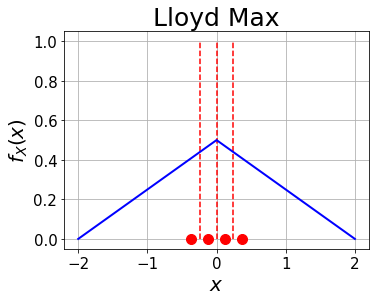

In [93]:
plt.figure(figsize=(12,4))
ax=plt.subplot(121)
line1, = ax.plot(triangle_dist[1,:],triangle_dist[0,:],label='Distribution',linewidth=2,color='b')
line2, = ax.plot(LloydMaxLevels,np.zeros(M),label='Quantization Levels',linewidth=0,color='r',marker='o',markersize=10)
line3 = ax.stem(LloydMaxThresholds,np.ones(M-1),basefmt=' ',markerfmt=' ',linefmt='r--',use_line_collection='True')

ax.grid()
ax.set_xlabel(r'$x$',fontsize=20)
ax.set_ylabel(r'$f_X(x)$',fontsize=20)
ax.tick_params(axis='both',labelsize=15)
ax.set_title('Lloyd Max',fontsize=25)

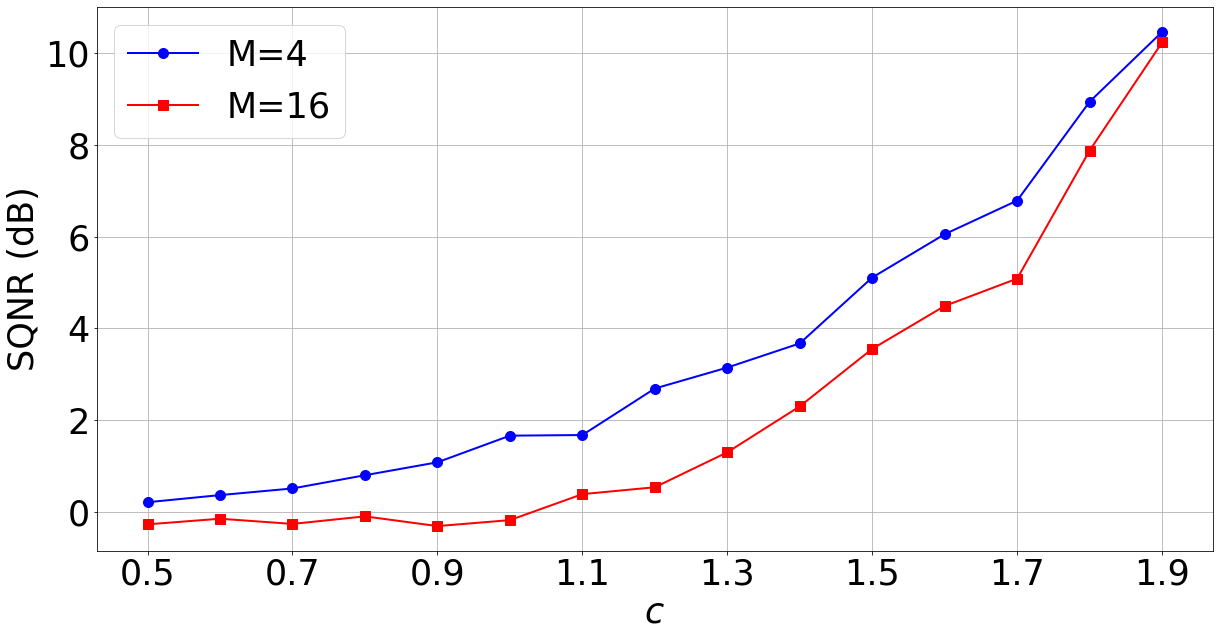

In [89]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
line1, = ax.plot(cn1,sqnr,label='M=4',linewidth=2,color='b',marker='o',markersize=10)
line2, = ax.plot(cn1,sqnr1,label='M=16',linewidth=2,color='r',marker='s',markersize=10)
plt.legend(handles=[line1,line2],loc=0,fontsize=35)
ax.grid()
ax.set_xlabel(r'$c$',fontsize=35)
ax.set_ylabel('SQNR (dB)',fontsize=35)
ax.tick_params(axis='both',labelsize=35)
ax.set_xticks(np.arange(0.5,2.1,0.2))
plt.show()

In [66]:
np.arange(0.5, 2.0, )

array([-0.5       , -0.16666667,  0.16666667,  0.5       ])